In [2]:
# load packages
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
# load SGCAST and refine function
sys.path.append('/SGCAST_downloadpath/SGCAST')
from utils.utils import refine_high


<AxesSubplot:title={'center':'SGCAST'}, xlabel='spatial1', ylabel='spatial2'>

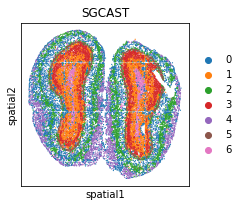

In [3]:
# output path where the result embeddings store
base_path = '/SGCAST_downloadpath/SGCAST/output'
# sample ID
ID ='Stereo-seq'

# Input .h5ad file
file_name = "training_intput_data_path/"+ID+"/"+ID+".h5ad"
# result embeddings for the sample
spots_embeddings = np.loadtxt(os.path.join(base_path, ID + '_embeddings.txt'))
stage = ID
adata = sc.read_h5ad(file_name)
adata.obsm['embedding'] = np.float32(spots_embeddings)
# number of neighbors to build the graph for louvain clustering
n_neighbors = 30 
# build the neighboring graph
sc.pp.neighbors(adata, use_rep='embedding', n_neighbors=n_neighbors) 
# default resolution
resolution = 1.2  
sc.tl.louvain(adata,  resolution=resolution)  
# spot size on plot
size = 6
# figure size
figsize = (3, 3) 
plt.rcParams["figure.figsize"] = figsize
# draw the plot
sc.pl.embedding(adata, basis="spatial", color="louvain", s=size, show=False,
                title='SGCAST')  


<AxesSubplot:title={'center':'SGCAST'}, xlabel='spatial1', ylabel='spatial2'>

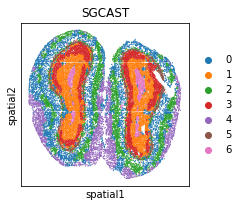

In [4]:
###########refine
# build spatial neighboring graph using spots coordinates
sc.pp.neighbors(adata, use_rep='spatial', n_neighbors=n_neighbors, key_added="pixel")
# extract the graph
arr = adata.obsp['pixel_connectivities']
# convert type to save memory
arr = arr.astype('int32')
pred = adata.obs["louvain"].astype('int32')
# refine the label according majority vote of neighbors
refined_pred = refine_high(pred=np.array(pred.tolist()), dis=arr, option=False)
# record the refined labels
adata.obs["refined_pred"] = refined_pred
adata.obs["refined_pred"] = adata.obs["refined_pred"].astype('category')
plt.rcParams["figure.figsize"] = figsize
# draw the refined plot
sc.pl.embedding(adata, basis="spatial", color="refined_pred", s=size, show=False,
                title='SGCAST') 